In [275]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from implementations import *
import datetime
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load the training data into feature matrix, class labels, and event ids:

In [276]:
from proj1_helpers import *
DATA_TRAIN_PATH = '/Users/AntoineDaeniker/Documents/EPFL/Master 1/ML_course/projects/project1/data/train.csv' # TODO: download train data and supply path here 
y, tX, tXt, ids = load_csv_data(DATA_TRAIN_PATH)
print(y.shape, tX.shape)

(250000,) (250000, 30)


## Do your thing crazy machine learning thing here :) ...

In [277]:
###### PRE_PROCESSING #######
temp = tX.copy()
tX_norm = np.zeros(tX.shape)
temp[temp == -999] = 0
mean_features = np.mean(temp, axis=0)
std_features = np.std(temp, axis=0)
for i, f in enumerate(tX.T):
    f[f == -999] = mean_features[i]
    tX_norm[:, i] = (f - mean_features[i]) / std_features[i]
    
tXt_norm = np.c_[np.ones(len(y)) / len(y), tX_norm]

In [278]:
seed = 6
ratio = 0.9

# from stochastic_gradient_descent import *
# Define the parameters of the algorithm.
max_iters = 50
gamma = 2*10**(-2)
batch_size = int(y.shape[0])

# Initialization
w_initial = np.random.rand(tXt_norm.shape[1])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tXt_norm, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("\nSGD: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(49/49): loss=0.8718293523934408, normgrad=0.8145805883396201
SGD: execution time=4.021 seconds


In [279]:
w_initial

array([0.02386051, 0.43908068, 0.32543343, 0.95740271, 0.20451128,
       0.52539787, 0.41229425, 0.10311393, 0.02562566, 0.47248256,
       0.0404111 , 0.30166992, 0.68467109, 0.64976803, 0.14825081,
       0.2157498 , 0.96146613, 0.90061595, 0.41627277, 0.91226336,
       0.24177863, 0.84553222, 0.78084411, 0.37804497, 0.1360763 ,
       0.50985377, 0.60922789, 0.07268154, 0.72748993, 0.6505092 ,
       0.02458107])

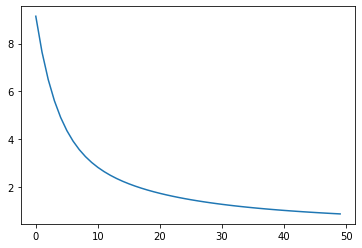

In [280]:
plt.plot(np.arange(max_iters), sgd_losses)

## Generate predictions and save ouput in csv format for submission:

In [ ]:
DATA_TEST_PATH = '/Users/AntoineDaeniker/Documents/EPFL/Master 1/ML_course/projects/project1/data/test.csv' # TODO: download train data and supply path here 
y_test, tX_test, tXt_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [ ]:
###### PRE_PROCESSING #######
temp_test = tX_test.copy()
tX_norm_test = np.zeros(tX_test.shape)
temp_test[temp_test == -999] = 0
mean_features_test = np.mean(temp_test, axis=0)
std_features_test = np.std(temp_test, axis=0)
for i, f in enumerate(tX_test.T):
    f[f == -999] = mean_features_test[i]
    tX_norm_test[:, i] = (f - mean_features_test[i]) / std_features_test[i]
    
tXt_norm_test = np.c_[np.ones(len(y_test)) / len(y_test), tX_norm_test]

In [ ]:
sgd_ws

In [ ]:
pred_train = predict_labels(sgd_ws, tXt_norm)
len(pred_train[abs(pred_train-y) == 0]) * 100 / len(y)

In [ ]:
pred_test = predict_labels(sgd_ws, tXt_norm_test)
len(pred_test[abs(pred_test-y_test) == 0]) * 100 / len(y_test)

In [196]:
OUTPUT_PATH = '' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(weights, tX_test)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)

NameError: name 'weights' is not defined